# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Weather Data Pull Start     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        continue
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Weather Data Pull Finish      ")
print("-----------------------------")

Weather Data Pull Start     
-----------------------------
Processing Record 1 of Set 1 | nava
Processing Record 2 of Set 1 | lewistown
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | baiao
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | biak
Processing Record 9 of Set 1 | mocambique
City not found. Skipping...
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | ust-ordynskiy
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | pontarlier
Processing Record 18 of Set 1 | jaciara
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | kidal
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 

Processing Record 33 of Set 4 | stornoway
City not found. Skipping...
Processing Record 34 of Set 4 | amderma
City not found. Skipping...
Processing Record 35 of Set 4 | charters towers
Processing Record 36 of Set 4 | kemijarvi
City not found. Skipping...
Processing Record 37 of Set 4 | airai
Processing Record 38 of Set 4 | higuey
City not found. Skipping...
Processing Record 39 of Set 4 | bambanglipuro
Processing Record 40 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 4 | avera
Processing Record 42 of Set 4 | margate
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | ordynskoye
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | lufilufi
Processing Record 49 of Set 4 | hobyo
Processing Record 0 of Set 5 | severobaykalsk
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | leningradskiy
Processing Record 3 of Set 5 | m

Processing Record 14 of Set 8 | motril
Processing Record 15 of Set 8 | cananeia
Processing Record 16 of Set 8 | hanzhong
Processing Record 17 of Set 8 | juruti
Processing Record 18 of Set 8 | tomatlan
Processing Record 19 of Set 8 | broken hill
Processing Record 20 of Set 8 | el carmen
Processing Record 21 of Set 8 | yangambi
Processing Record 22 of Set 8 | sinnamary
Processing Record 23 of Set 8 | lavrentiya
Processing Record 24 of Set 8 | egvekinot
Processing Record 25 of Set 8 | vila franca do campo
Processing Record 26 of Set 8 | bathsheba
Processing Record 27 of Set 8 | ust-karsk
Processing Record 28 of Set 8 | umm kaddadah
Processing Record 29 of Set 8 | krasnoselkup
City not found. Skipping...
Processing Record 30 of Set 8 | rio do sul
Processing Record 31 of Set 8 | puerto del rosario
Processing Record 32 of Set 8 | itaberai
Processing Record 33 of Set 8 | itoman
Processing Record 34 of Set 8 | kapoeta
City not found. Skipping...
Processing Record 35 of Set 8 | tilichiki
Proces

Processing Record 45 of Set 11 | jining
Processing Record 46 of Set 11 | nishihara
Processing Record 47 of Set 11 | yar-sale
Processing Record 48 of Set 11 | khani
Processing Record 49 of Set 11 | auki
Processing Record 0 of Set 12 | dumai
Processing Record 1 of Set 12 | monywa
Processing Record 2 of Set 12 | baruun-urt
Processing Record 3 of Set 12 | hambantota
Processing Record 4 of Set 12 | klaksvik
Processing Record 5 of Set 12 | fairbanks
Processing Record 6 of Set 12 | zomin
Processing Record 7 of Set 12 | bintulu
Processing Record 8 of Set 12 | rio grande
Processing Record 9 of Set 12 | alihe
Processing Record 10 of Set 12 | zyryanka
Processing Record 11 of Set 12 | kuala perlis
Processing Record 12 of Set 12 | gisors
Processing Record 13 of Set 12 | verkhnyaya toyma
Processing Record 14 of Set 12 | kinablangan
Processing Record 15 of Set 12 | kaili
Processing Record 16 of Set 12 | taltal
Processing Record 17 of Set 12 | domat
Processing Record 18 of Set 12 | san vicente
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [8]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nava,9,IN,1568687667,79,24.13,72.17,82.02,8.21
1,lewistown,1,US,1568687461,78,40.39,-90.15,75.00,5.82
2,ponta do sol,52,BR,1568687667,39,-20.63,-46.00,73.56,4.81
3,saint-philippe,1,CA,1568687668,55,45.36,-73.48,60.80,8.05
4,baiao,46,BR,1568687668,76,-2.79,-49.67,77.34,2.28


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

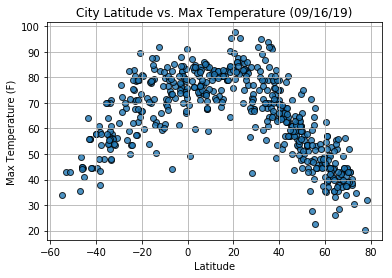

In [9]:
#Using Scatter Plot to Visualise the relationship between Latitude and Temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Visualise plot
plt.show()

#### Latitude vs. Humidity Plot

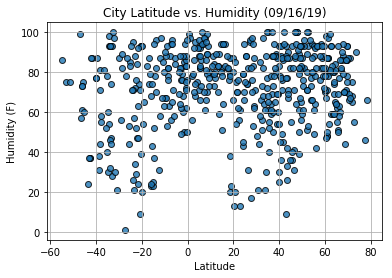

In [10]:
#Using Scatter Plot to Visualise the relationship between Latitude and Humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Visualise plot
plt.show()

#### Latitude vs. Cloudiness Plot

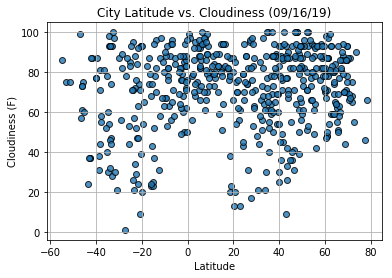

In [11]:
#Using Scatter Plot to Visualise the relationship between Latitude and Humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Visualise plot
plt.show()

#### Latitude vs. Wind Speed Plot

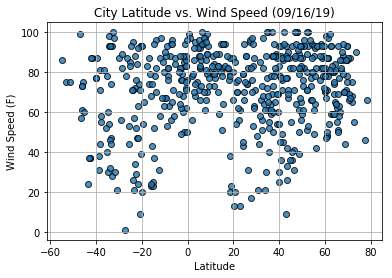

In [13]:
#Using Scatter Plot to Visualise the relationship between Latitude and Wind Speed
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Visualise plot
plt.show()